# Analyse exploratoire de données

Il s'agit de données de prix de billets d'avions entre Paris et 5 destinations (Londres, Moscou, Oslo, Madrid et Athènes) pour des allers-retours entre début avril et fin septembre 2022 pour lesquelles nous avons relévé 8 caractéristiques à savoir:

• Le nom de la compagnie  
• Le nombre d'escales

• Le prix du billet d'avion

• La durée du trajet

• La destination

• La distance entre Paris et la ville de destination

• La date d'aller

• Et enfin la date de retour

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


In [179]:
df = pd.read_excel('/content/base_a_traiter.xlsx')

In [180]:
df

,Unnamed: 0,Compagnie,Total d'escales,Destination,Distance,Date_aller,Date_retour,Prix,Duree de vol
0,0,Air France,0,Oslo,1344.00,2022-04-01,2022-04-08,204,2.333333
1,1,Air France,0,Oslo,1344.00,2022-04-01,2022-04-08,204,2.500000
2,2,Flyr AS,0,Oslo,1344.00,2022-04-01,2022-04-08,195,2.416667
3,3,Flyr AS,0,Oslo,1344.00,2022-04-01,2022-04-08,195,2.416667
4,4,Norwegian,0,Oslo,1344.00,2022-04-01,2022-04-08,186,2.333333
...,...,...,...,...,...,...,...,...,...
61329,61343,Turkish Airlines,1,Athenes,2095.52,2022-06-10,2022-06-17,294,7.333333
61330,61344,Sky Express,0,Athenes,2095.52,2022-06-10,2022-06-17,1874,3.000000
61331,61345,SWISS,1,Athenes,2095.52,2022-06-10,2022-06-17,1874,5.500000
61332,61346,Sky Express,0,Athenes,2095.52,2022-06-10,2022-06-17,1879,3.000000


In [181]:
df = df.drop('Unnamed: 0',axis=1)

In [182]:
df

,Compagnie,Total d'escales,Destination,Distance,Date_aller,Date_retour,Prix,Duree de vol
0,Air France,0,Oslo,1344.00,2022-04-01,2022-04-08,204,2.333333
1,Air France,0,Oslo,1344.00,2022-04-01,2022-04-08,204,2.500000
2,Flyr AS,0,Oslo,1344.00,2022-04-01,2022-04-08,195,2.416667
3,Flyr AS,0,Oslo,1344.00,2022-04-01,2022-04-08,195,2.416667
4,Norwegian,0,Oslo,1344.00,2022-04-01,2022-04-08,186,2.333333
...,...,...,...,...,...,...,...,...
61329,Turkish Airlines,1,Athenes,2095.52,2022-06-10,2022-06-17,294,7.333333
61330,Sky Express,0,Athenes,2095.52,2022-06-10,2022-06-17,1874,3.000000
61331,SWISS,1,Athenes,2095.52,2022-06-10,2022-06-17,1874,5.500000
61332,Sky Express,0,Athenes,2095.52,2022-06-10,2022-06-17,1879,3.000000


In [127]:
#variables et types des données
df.dtypes

Compagnie                  object
Total d'escales             int64
Destination                object
Distance                  float64
Date_aller         datetime64[ns]
Date_retour        datetime64[ns]
Prix                        int64
Duree de vol              float64
dtype: object

In [128]:
df.isnull().sum()

Compagnie          15
Total d'escales     0
Destination         0
Distance            0
Date_aller          0
Date_retour         0
Prix                0
Duree de vol        0
dtype: int64

Il est normal qu'il n'y ait pas de données manquantes pour ce dataset particulier puisque ce dernier est constitué d'un ensemble de données de ventes de prix de billets d'avion. 

In [129]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Total d'escales,61334.0,0.543516,0.523390,0.000000,0.000000,1.0,1.000000,2.00
Distance,61334.0,1464.821966,572.185078,342.760000,1054.000000,1054.0,2095.520000,2486.34
Prix,61334.0,297.329507,321.283995,33.000000,153.000000,219.0,333.000000,3768.00
Duree de vol,61334.0,4.840866,3.004285,1.083333,2.083333,4.5,6.416667,28.25


On obtient des éléments statistques (moyenne, écart-type, quartile, ...) pour la distance, le prix, la durée du vol et le nombre d'escales.  

Commençons par tracer une distribution de notre variable cible (le prix):

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


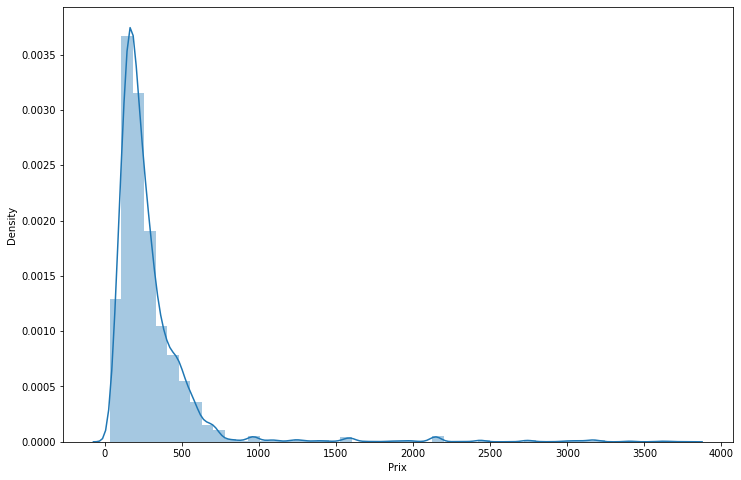

In [130]:
plt.figure(figsize=(12,8))
sns.distplot(df['Prix']);

Les prix de billets d'avion sont en très grande majorité entre 0 et 1000 €.


In [131]:
#Regardons les variables qui sont le plus corrélés au Prix

df.corr()['Prix'].sort_values()

Total d'escales    0.093786
Duree de vol       0.145178
Distance           0.303020
Prix               1.000000
Name: Prix, dtype: float64

Dans cette partie, nous proposons de regarder la relation affine entre le prix du billet d'avion et nos variables numériques:

[Text(0, 0.5, "Prix selon le nombre d'escales durant le trajet"),
 Text(0.5, 0, "Nombre d'escales")]

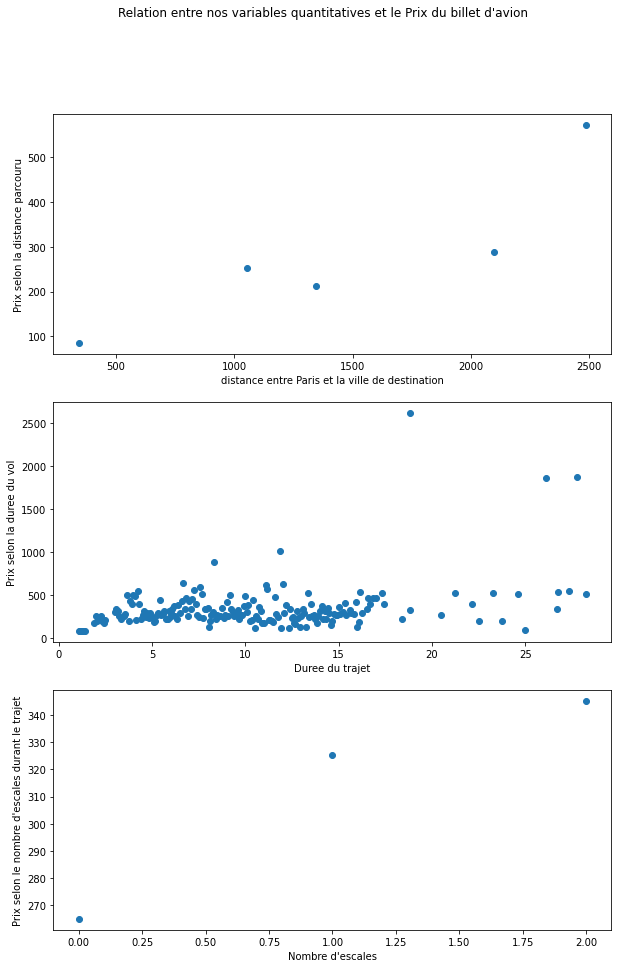

In [132]:
fig, axs = plt.subplots(3, 1, figsize=(10,15))
fig.suptitle("Relation entre nos variables quantitatives et le Prix du billet d'avion")

test00=df.groupby('Distance',as_index=False).mean()
axs[0].scatter(test00['Distance'], test00['Prix'])
axs[0].set(xlabel='distance entre Paris et la ville de destination', ylabel='Prix selon la distance parcouru')

test01=df.groupby('Duree de vol',as_index=False).mean()
axs[1].scatter(test01['Duree de vol'], test01['Prix'])
axs[1].set(xlabel='Duree du trajet', ylabel='Prix selon la duree du vol')

test02=df.groupby("Total d'escales",as_index=False).mean()
axs[2].scatter(test02["Total d'escales"], test02['Prix'])
axs[2].set(xlabel="Nombre d'escales", ylabel="Prix selon le nombre d'escales durant le trajet")



Selon ces graphiques, nous pouvons constater que :

• il semblerait que la distance qui sépare Paris et la ville de destination ait une influence sur le prix;

• La durée du trajet et le nombre d'escales ne semblent pas beaucoup influencer le prix;


Dans les prochaines sections nous poussons notre analyse avec la matrice de corrélation et l'analyse en composante principale (PCA)

# Tableau de corrélation

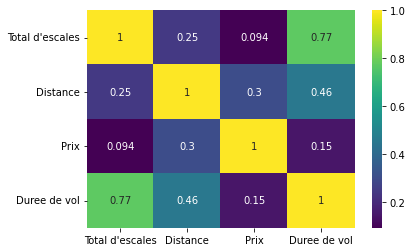

<function seaborn.matrix.heatmap>

In [133]:
sns.heatmap(data=df.iloc[:, 1:10].corr(), cmap = 'viridis', annot=True)
plt.show()
sns.heatmap

Cette matrice des corrélations linéaires entre les différentes variables quantitatives de notre jeu de données nous montre l'existence:

• d'une très grande corrélation positive entre le nombre total d'escales et la durée du vol.

• d'une corrélation positive entre le prix du billet d'avion et la distance du trajet.

• d'une faible corrélation entre le prix du billet d'avion et la durée du vol.

• d'une corrélation positive entre la distance et la durée du vol. 



Ensuite, nous reprenons la matrice de corrélation précédente en ayant supprimer au préalable les valeurs extrêmes du prix que nous avons fixé arbitrairement au top 1% des prix de billets d'avion les plus élévés. 

In [188]:
# Le top 10% des billets d'avion les plus chers
len(df)*0.1

6133.400000000001

In [191]:
# on élimine de notre jeu de données les prix extrêmes 
non_top_10_perc= df.sort_values('Prix', ascending= False).iloc[6133:]


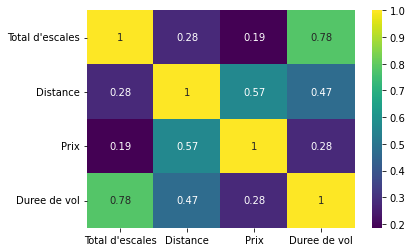

In [192]:

sns.heatmap(data=non_top_1_perc.iloc[:, 1:10].corr(), cmap = 'viridis', annot=True)
plt.show()

En éliminant ces valeurs extrêmes on obtient:

• toujours une grande corrélation entre le nombre total d'escales et la durée du vol

• une plus grande corrélation entre la distance et le prix du billet d'avion ce qui est assez intuitif!;

• une corrélation positive mais certes faible entre la distance et le nombre total d'escales ;

• d'une corrélation positive entre la durée du vol et la distance du trajet ce qui est normal;

•d'une faible corrélation positive entre la durée du vol et le prix

•d'une faible corrélation positive entre le nombre total d'escales et le prix


#ACP

Afin de visualiser en même temps tous nos variables quantitatives( Total d'escales, Duree de vol, Prix, Distance) sur un plan, la solution est d’effectuer une projection orthogonale. Malheureusement, quand on projette des points, on perd de l’information. 

C’est ici la clé de l’ACP : rechercher la projection pour laquelle l’inertie des points est maximale.

Nous proposons d'afficher les cercles de corrélation pour regarder quels sont les variables qui sont le plus corrélés avec le prix du billet d'avion.

In [137]:
#Fonctions pour la représentation du cercle de corrélation

def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, varsup=None, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 2 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(7,6))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            #variables illustratives
            if varsup is not None:
               corsup = np.zeros(n_comp)
               for j in range(n_comp):
                  corsup[j] = np.corrcoef(varsup,X_projected[:,j])[0,1]
               plt.annotate(varsup.name,(corsup[d1-1],corsup[d2-1]),color='g')
  

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

In [138]:
from sklearn.decomposition import PCA
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
# choix du nombre de composantes à calculer
n_comp = 2

mycolumns = ["Total d'escales" , 'Duree de vol', 'Distance']

df_pca = df[mycolumns]

# préparation des données pour l'ACP
df_pca = df_pca.fillna(df_pca.mean()) # Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable
X = df_pca.values
names = df.index #pour avoir les intitulés

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)


PCA(n_components=2)

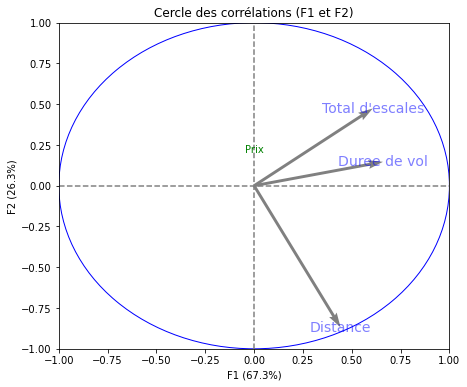

In [139]:
# Cercle des corrélations
pcs = pca.components_

display_circles(pcs, X.shape[1], acp, [(0,1)],labels = np.array(mycolumns),varsup=df['Prix'])

Les variables les mieux représentées en deux dimensions sont ceux dont les flèches sont
les plus longues. On en déduit donc que la varibable Distance est la mieux corrélée avec la variable Prix, ce qui confirme nos précédents résultats.

Les variables Total d'escales et Duree de vol sont moins bien présentées dans les axes, elles sont moins corrélées avec le Prix.

L'autre point à soulever ici est que les 2 premières dimension contiennent 93% de l'inertie totale (l’inertie est la variance totale du tableau de données, i.e. la trace de la matrice des corrélations)

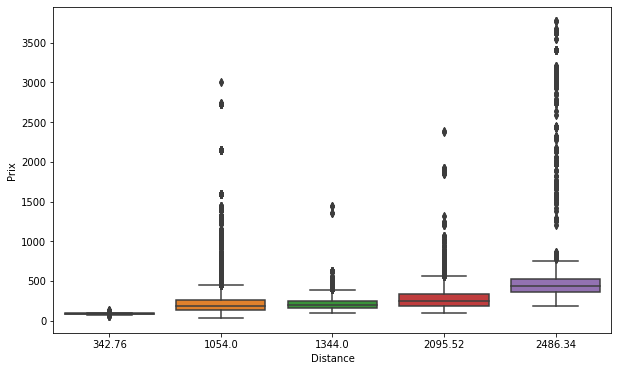

In [140]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Distance', y='Prix', data=df)

Les prix augmentent beaucoup à partir d'une distance supérieure à 1344 km.

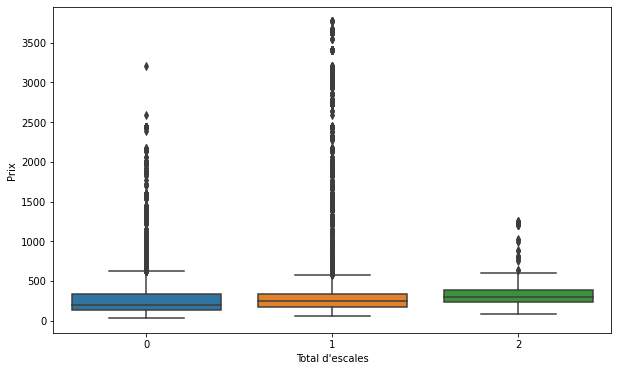

In [141]:

# Regardons la distribution des prix par nombre d'escales 

plt.figure(figsize=(10,6))
sns.boxplot(x="Total d'escales", y='Prix', data=df)

# Ingiénérie des caractéristiques

Nous allons extraire les mois de vente des billets afin de voir après s'il y une tendance de vente des billets d'avion qui se dégage (par exemple une montée des prix pendant la période estivale). 

Etant donné qu'une personne achète en même temps son billet(aller-retour), nous décidons de nous concentrer ici seulement sur la date aller

In [193]:
#Dans la suite :

df= non_top_10_perc

In [194]:
df['month'] = df['Date_aller'].apply(lambda date:date.month)

In [195]:
df['year'] = df['Date_aller'].apply(lambda date:date.year)

In [196]:
df.shape

(55201, 10)

In [197]:
df.head()

,Compagnie,Total d'escales,Destination,Distance,Date_aller,Date_retour,Prix,Duree de vol,month,year
18007,Air France,0,Moscou,2486.34,2022-09-16,2022-09-23,504,4.083333,9,2022
61130,Iberia,1,Athenes,2095.52,2022-06-10,2022-06-17,504,6.750000,6,2022
61131,Iberia,1,Athenes,2095.52,2022-06-10,2022-06-17,504,8.166667,6,2022
12974,Aeroflot,0,Moscou,2486.34,2022-06-10,2022-06-17,504,4.000000,6,2022
11520,Air France,1,Moscou,2486.34,2022-05-06,2022-05-13,504,7.333333,5,2022


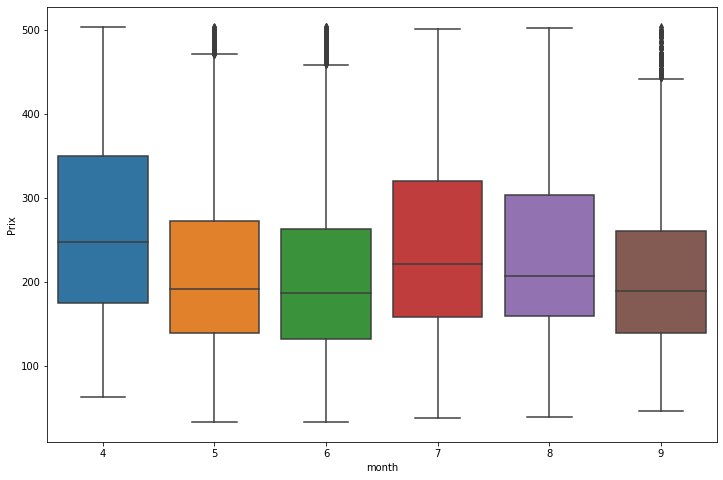

In [198]:
plt.figure(figsize=(12,8))
sns.boxplot(x='month',y='Prix',data=df);

Il est difficile de dire clairement s'il y a une tendance qui se dégage. 

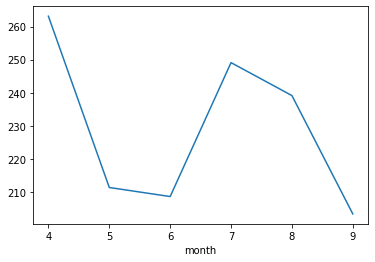

In [199]:
df.groupby('month').mean()['Prix'].plot();

Il semble y avoir des différences de prix de ventes de billets d'avion entre les mois:

• Les prix valent en moyenne environ 210€ au mois de mai alors qu'ils sont à 260€ au mois d'avril

• Les prix des billets d'avion baissent drastiquement au mois de septembre.

Nous avons extrait de la variable "Date_aller" ("Date_retour") l'information qui nous intéressait, nous pouvons donc la supprimer.

In [200]:
df = df.drop('Date_aller',axis=1)
df= df.drop('Date_retour', axis=1)

In [201]:
df.dtypes

Compagnie           object
Total d'escales      int64
Destination         object
Distance           float64
Prix                 int64
Duree de vol       float64
month                int64
year                 int64
dtype: object

In [202]:
df= df.drop('Compagnie', axis=1)

In [203]:
#
df= df.drop('Destination', axis=1)

## Mise à l'échelle et Répartition Entraînement / Test

In [204]:
X = df.drop('Prix',axis=1)
y = df['Prix']

In [205]:
from sklearn.model_selection import train_test_split

In [206]:
#Répartition entraînement/test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

Après avoir fait la répartition de nos données, nous pouvons faire la mise à l'échelle ou scaling. Pour rappel, cette mise à l'échelle est uniquement adaptée à nos données d'entraînement pour éviter toute fuite de données depuis le set de test.

### Mise à l'échelle (Scaling)

In [207]:
from sklearn.preprocessing import MinMaxScaler

In [208]:
# On crée une instance de ce MinMaxScaler
scaler = MinMaxScaler()

In [209]:
# On rédefinit notre set d'entraînement à échelle 
X_train= scaler.fit_transform(X_train) # adapter le set d'entraînement et le transformer en même temps

In [210]:
X_test = scaler.transform(X_test) # On adapte à partir de données de test donc pas de .fit qui ferait fuiter des informations

In [211]:
X_train.shape

(38640, 5)

On a 5 features d'entrée, ça serait donc une bonne chose d'avoir 5 neurones dans notre couche

In [212]:
X_test.shape

(16561, 5)

## Création du modèle

In [213]:
from tensorflow.keras.models import Sequential   #on importe le modèle séquentiel
from tensorflow.keras.layers import Dense, Activation  #on importe la couche dense
from tensorflow.keras.optimizers import Adam

In [214]:
model = Sequential()

model.add(Dense(5,activation='relu')) #On copie-colle ce code plusieurs fois pour avoir des couches cachées
model.add(Dense(5,activation='relu')) # et obtenir un réseau de neurone de deep learning
model.add(Dense(5,activation='relu'))
model.add(Dense(5,activation='relu'))


model.add(Dense(1)) # Couche final avec un seul neurone

model.compile(optimizer='adam',loss='mse') #On utilise l'optimizer adam


## Entraînement du modèle

In [215]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400) #On nourrit notre data_set par batch de données d'entraînements
                                     # On fixe les epochs à 400
                                     #epoch=temps d'entraînement

Epoch 1/400
302/302 [==============================] - 2s 3ms/step - loss: 60343.0820 - val_loss: 52084.7148
Epoch 2/400
302/302 [==============================] - 2s 6ms/step - loss: 23598.8262 - val_loss: 9240.2871
Epoch 3/400
302/302 [==============================] - 1s 5ms/step - loss: 9071.9541 - val_loss: 8649.3789
Epoch 4/400
302/302 [==============================] - 1s 5ms/step - loss: 8358.5264 - val_loss: 7939.4468
Epoch 5/400
302/302 [==============================] - 1s 5ms/step - loss: 7830.1069 - val_loss: 7557.0259
Epoch 6/400
302/302 [==============================] - 1s 4ms/step - loss: 7570.1953 - val_loss: 7390.5498
Epoch 7/400
302/302 [==============================] - 1s 5ms/step - loss: 7463.4565 - val_loss: 7323.8579
Epoch 8/400
302/302 [==============================] - 2s 6ms/step - loss: 7417.7695 - val_loss: 7291.5132
Epoch 9/400
302/302 [==============================] - 1s 2ms/step - loss: 7389.6289 - val_loss: 7272.3770
Epoch 10/400
302/302 [============

In [216]:
#Nous explorons l'historique de notre model
model.history.history

{'loss': [60343.08203125,
  23598.826171875,
  9071.9541015625,
  8358.5263671875,
  7830.10693359375,
  7570.1953125,
  7463.45654296875,
  7417.76953125,
  7389.62890625,
  7374.8134765625,
  7364.7861328125,
  7358.32568359375,
  7354.25439453125,
  7350.1142578125,
  7348.89453125,
  7346.7744140625,
  7347.330078125,
  7344.451171875,
  7342.1298828125,
  7340.56298828125,
  7340.98974609375,
  7333.1279296875,
  7330.56884765625,
  7331.6357421875,
  7328.9208984375,
  7326.73291015625,
  7325.27783203125,
  7325.7216796875,
  7322.7470703125,
  7318.38818359375,
  7321.8046875,
  7320.12158203125,
  7320.630859375,
  7316.03076171875,
  7315.82373046875,
  7315.8896484375,
  7312.734375,
  7313.9990234375,
  7307.54443359375,
  7310.0546875,
  7311.4619140625,
  7309.35986328125,
  7305.32568359375,
  7308.2109375,
  7306.29638671875,
  7301.884765625,
  7298.419921875,
  7298.7041015625,
  7298.79150390625,
  7298.41259765625,
  7297.482421875,
  7297.220703125,
  7295.23828125

In [217]:
losses = pd.DataFrame(model.history.history)

In [218]:
losses
#donne en même temps ma perte sur mes données d'entraînements et mes données de test

,loss,val_loss
0,60343.082031,52084.714844
1,23598.826172,9240.287109
2,9071.954102,8649.378906
3,8358.526367,7939.446777
4,7830.106934,7557.025879
...,...,...
395,7280.936523,7181.231934
396,7278.949707,7175.208984
397,7280.008301,7181.347168
398,7276.710449,7184.933105


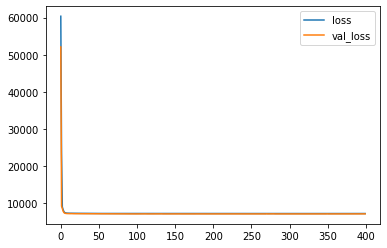

In [219]:
losses.plot()

#On peut comparer directement le comportement de ma fonction de perte d'entraînement et de test

Nous observons un même comportement du set de test (d'entraînement) et du set de validation, donc on est pas en surapprentissage( overfitting)

## Évaluation sur les données Test

In [220]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

### Prédiction sur de toutes nouvelles données

In [221]:
X_test

array([[0.5       , 0.46708777, 0.17791411, 0.        , 0.        ],
       [0.5       , 0.33180007, 0.24233129, 1.        , 0.        ],
       [0.5       , 0.46708777, 0.12269939, 1.        , 0.        ],
       ...,
       [0.5       , 0.46708777, 0.21779141, 0.        , 0.        ],
       [0.        , 0.33180007, 0.03680982, 0.4       , 0.        ],
       [0.        , 0.33180007, 0.03680982, 0.6       , 0.        ]])

In [222]:
# On prédit sur le set de test
predictions = model.predict(X_test)

In [223]:
predictions

array([[211.81772],
       [211.7093 ],
       [243.47313],
       ...,
       [211.07385],
       [178.212  ],
       [185.22511]], dtype=float32)

On a une liste de prédictions et nous allons maintenant comparer cette liste avec une liste de prix réels.

In [224]:
mean_absolute_error(y_test,predictions)

67.07792684397154

In [225]:
np.sqrt(mean_squared_error(y_test,predictions))

84.77135240792467

Il semble qu'en moyenne on a un écart de 300€ sur tous les prix de billets d'avion. Pour savoir s'il s'agit d'une bonne ou mauvaise erreur,nous devons prendre en compte de notre dataframe.

In [226]:
df['Prix'].describe()

count    55201.000000
mean       226.877665
std        104.565840
min         33.000000
25%        148.000000
50%        203.000000
75%        290.000000
max        504.000000
Name: Prix, dtype: float64

In [227]:
# Part de la variance expliquée par le modèle
explained_variance_score(y_test,predictions)

0.34025486113892156

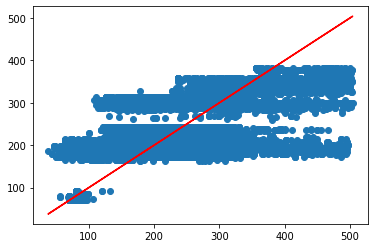

In [228]:
# Nos prédictions
plt.scatter(y_test,predictions)

# Prédictions parfaites
plt.plot(y_test,y_test,'r');

Cette ligne rouge représente une prédiction parfaite.

Notre modèle est pénalisé par des valeurs abérantes